In [79]:
import numpy as np
import pandas as pd
import re

In [80]:
train = pd.read_csv("/Users/zhansaya/Downloads/nlp-getting-started/train.csv")
test = pd.read_csv("/Users/zhansaya/Downloads/nlp-getting-started/test.csv")

Text cleaning

In [81]:
def clearText(text):
    # to lower
    text = text.lower()
    # remove URLs
    text = re.sub('https?://[A-Za-z0-9./?&=_]+','',text)
    # hashtags
    text = re.sub('#[A-Za-z0-9]+','',text)
    # mentions
    text = re.sub('@[A-Za-z0-9._-]+','',text)
    # pontuation
    text = re.sub(r"[^\w\s]","",text)
    # whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # words in sqare brackets
    text = re.sub('\[.*?\]', '', text)
    # words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [82]:
train['text'] = train['text'].apply(lambda x:clearText(x))

In [83]:
# removing stopwords
import nltk
from nltk.corpus import stopwords
sw=stopwords.words('english')
train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

Text Exploration

In [84]:
def mydict(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    mydict = {'word':check.index,'freq':check.values}
    mydict = pd.DataFrame(mydict)
    mydict.index = mydict['word']
    mydict.drop('word', axis = 1, inplace = True)
    mydict.sort_values('freq', ascending=False, inplace=True)
    
    return mydict

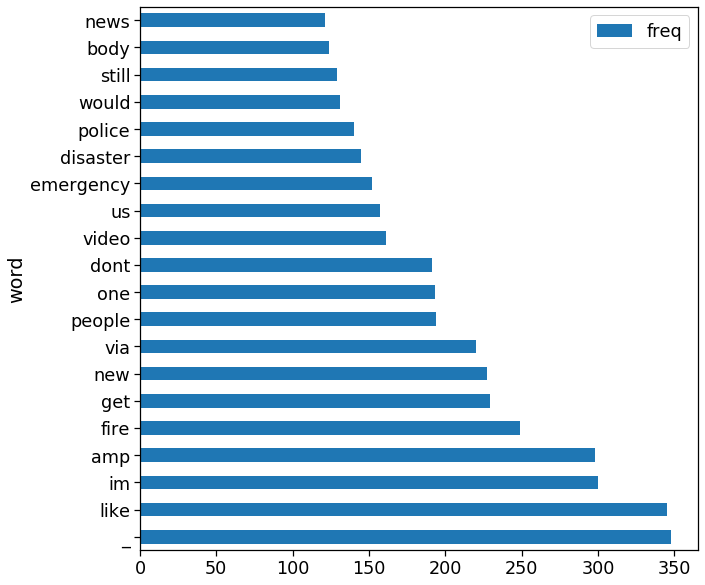

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
mydict_unclean = mydict(train['text'])

sns.set_context(context = 'notebook', font_scale = 1.6)
mydict_unclean[:20].plot(kind = 'barh', figsize = (10, 10));

Data Spliting

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import  f1_score, classification_report

In [87]:
X = train['text']
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0,test_size=0.15)

In [88]:
vect = CountVectorizer().fit(X_train)
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

Model selection

Decision Tree Model
Gradient Boosting Model
K - Nearest Neighbors Model
Logistic Regression Model
Stochastic Gradient Descent Model
Support Vector Machine Model
Bernoulli Naive Bayes Model
Gaussian Naive Bayes Model
Multinomial Naive Bayes Model

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


In [124]:
# Define models
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', algorithm = 'brute')
tree = DecisionTreeClassifier(criterion= 'entropy', max_depth = None, splitter='best', random_state=0)
logReression = LogisticRegression(penalty='l2', solver='saga', random_state = 55)  
randomForest = RandomForestClassifier(random_state=0)
gradientBoosting = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 100, max_depth = 30, random_state=0)
SGD = SGDClassifier(loss = 'hinge', penalty = 'l1', learning_rate = 'optimal', random_state = 0, max_iter=100)
SVC = SVC(kernel= 'linear', degree=3, max_iter=10000, C=2, random_state = 0)
bernoulliNBModel = BernoulliNB(alpha=0.1)
multinomialNBModel = MultinomialNB(alpha=0.1)


In [126]:
pd.DataFrame({
    'model':['knn', 'tree', 'logReression', 'randomForest', 'gradientBoosting', 'SGD', 'SVC', 'bernoulliNBModel', 'multinomialNBModel'],
    'mean':score_mean,
    'std':score_std
})

,model,mean,std
0,knn,0.605505,0.028327
1,tree,0.674871,0.011783
2,logReression,0.729791,0.016989
3,randomForest,0.685846,0.012784
4,gradientBoosting,0.615712,0.013550
5,SGD,0.698083,0.019040
6,SVC,0.701163,0.024999
7,bernoulliNBModel,0.719002,0.016745
8,multinomialNBModel,0.721177,0.015076


Evolution

In [127]:
#evaluation Details
models = [knn, tree, logReression, randomForest, gradientBoosting, SGD, SVC, bernoulliNBModel, multinomialNBModel]

for model in models:
    model.fit(X_train,y_train)
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_train, y_train))
    print(type(model).__name__,' Test Score is    : ' ,model.score(X_test, y_test))
    
    y_pred = model.predict(X_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))
    print('--------------------------------------------------------------------------')

KNeighborsClassifier  Train Score is   :  0.7400710863854119
KNeighborsClassifier  Test Score is    :  0.6103327495621717
KNeighborsClassifier  F1 Score is      :  0.6419951729686243
--------------------------------------------------------------------------
DecisionTreeClassifier  Train Score is   :  0.985319116056251
DecisionTreeClassifier  Test Score is    :  0.7556917688266199
DecisionTreeClassifier  F1 Score is      :  0.7132579650565262
--------------------------------------------------------------------------
LogisticRegression  Train Score is   :  0.9422036779477669
LogisticRegression  Test Score is    :  0.797723292469352
LogisticRegression  F1 Score is      :  0.7480916030534351
--------------------------------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier  Train Score is   :  0.9706382321125019
RandomForestClassifier  Test Score is    :  0.7705779334500875
RandomForestClassifier  F1 Score is      :  0.721276595744681
--------------------------------------------------------------------------
GradientBoostingClassifier  Train Score is   :  0.8028125482923814
GradientBoostingClassifier  Test Score is    :  0.7390542907180385
GradientBoostingClassifier  F1 Score is      :  0.6139896373056993
--------------------------------------------------------------------------
SGDClassifier  Train Score is   :  0.9656930922577655
SGDClassifier  Test Score is    :  0.7828371278458844
SGDClassifier  F1 Score is      :  0.7405857740585774
--------------------------------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC  Train Score is   :  0.9794467624787514
SVC  Test Score is    :  0.776707530647986
SVC  F1 Score is      :  0.7301587301587303
--------------------------------------------------------------------------
BernoulliNB  Train Score is   :  0.9364858599907279
BernoulliNB  Test Score is    :  0.7985989492119089
BernoulliNB  F1 Score is      :  0.7505422993492407
--------------------------------------------------------------------------
MultinomialNB  Train Score is   :  0.9350950394065832
MultinomialNB  Test Score is    :  0.7933450087565674
MultinomialNB  F1 Score is      :  0.747323340471092
--------------------------------------------------------------------------


Model choice
Log regression